<a href="https://colab.research.google.com/github/VictorMarques94/IntCD/blob/master/ProjetoCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto: Eleições 2018, análise do resultado das eleições para Governador de Pernambuco, por município e Região de Desenvolvimento.**


Em meio a polarização política no Brasil, nunca se discutiu tanto o uso dos dados, das mais variadas fontes, em campanhas eleitorais.
Nesse contexto, considero importante, a análise de dados das elições para Governador de Pernambuco em 2018. 

# Aluno: Victor Marques Alves
Disciplina: Introdução à Análise de Dados

Professsor: Luciano Barbosa

Fonte: Banco pessoal. Informações retiradas do repositório do TRE

# Carregando a Base de Dados

In [0]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np


In [0]:
#Importando a nossa base de trabalho
base=pd.read_csv("https://raw.githubusercontent.com/VictorMarques94/IntCD/master/1%20PERNAMBUCO.csv",encoding = "ISO-8859-1")

In [189]:
#Detalhe da Base
base.shape

(185, 1)

In [0]:
#Separando as Colunas por Ponto e Virgula
base=pd.read_csv("https://raw.githubusercontent.com/VictorMarques94/IntCD/master/1%20PERNAMBUCO.csv",encoding = "ISO-8859-1",sep=";")

In [191]:
#Detalhe da base após alteração
base.shape

(185, 7)

In [192]:
#Informações da Base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
RD           185 non-null object
MUNICIPIO    185 non-null object
ELEITORES    185 non-null int64
VOTOS        185 non-null int64
PC           185 non-null int64
AM           185 non-null int64
OUTROS       185 non-null int64
dtypes: int64(5), object(2)
memory usage: 10.2+ KB


In [193]:
#Visual das primeiras linhas
base.head()

,RD,MUNICIPIO,ELEITORES,VOTOS,PC,AM,OUTROS
0,METROPOLITANA,RECIFE,1155816,718245,311792,239123,167330
1,METROPOLITANA,JABOATÌO DOS GUARARAPES,452277,231682,107669,82928,41085
2,METROPOLITANA,OLINDA,276081,169700,81276,50904,37520
3,METROPOLITANA,PAULISTA,208363,129039,63229,40762,25048
4,AGRESTE CENTRAL,CARUARU,216900,123843,50996,57523,15324


In [194]:
#Visual das Últimas Linhas
base.tail()

,RD,MUNICIPIO,ELEITORES,VOTOS,PC,AM,OUTROS
180,SERTÌO DE ITAPARICA,ITACURUBA,3895,2572,1806,624,142
181,AGRESTE MERIDIONAL,CALADO,6401,3907,1789,1909,209
182,SERTÌO DO PAJEò,INGAZEIRA,3765,2536,1614,896,26
183,AGRESTE CENTRAL,IBIRAJUBA,6422,3420,1537,1736,147
184,METROPOLITANA,FERNANDO DE NORONHA,2743,1450,877,420,153


In [195]:
#Verificando os Tipos de Dados 
base.dtypes

RD           object
MUNICIPIO    object
ELEITORES     int64
VOTOS         int64
PC            int64
AM            int64
OUTROS        int64
dtype: object

In [196]:
#Alterando os tipos de Dados
base.RD = base.RD.astype('category')
base.MUNICIPIO = base.MUNICIPIO.astype('category')


base.dtypes

RD           category
MUNICIPIO    category
ELEITORES       int64
VOTOS           int64
PC              int64
AM              int64
OUTROS          int64
dtype: object

#LIMPEZA DA BASE

Verificação de linhas repetidas

In [197]:
base[base.duplicated(keep=False)]


,RD,MUNICIPIO,ELEITORES,VOTOS,PC,AM,OUTROS


*Não há linhas repetidas na base*


Verificando se existem dados ausentes

In [198]:
base.isna().sum()


RD           0
MUNICIPIO    0
ELEITORES    0
VOTOS        0
PC           0
AM           0
OUTROS       0
dtype: int64

*Não há dados ausentes*

O comparativo será realizado, considerando apenas as candidaturas de Paulo Câmara (PC) e Armando Monteiro (AM). Portanto, iremos remover as colunas referentes a Outros candidatos


In [199]:
base.drop('OUTROS', axis=1, inplace=True)
base.head()


,RD,MUNICIPIO,ELEITORES,VOTOS,PC,AM
0,METROPOLITANA,RECIFE,1155816,718245,311792,239123
1,METROPOLITANA,JABOATÌO DOS GUARARAPES,452277,231682,107669,82928
2,METROPOLITANA,OLINDA,276081,169700,81276,50904
3,METROPOLITANA,PAULISTA,208363,129039,63229,40762
4,AGRESTE CENTRAL,CARUARU,216900,123843,50996,57523


#Correlação

In [200]:
base.corr(method='spearman')

,ELEITORES,VOTOS,PC,AM
ELEITORES,1.000000,0.988076,0.911088,0.893724
VOTOS,0.988076,1.000000,0.927603,0.895025
PC,0.911088,0.927603,1.000000,0.699125
AM,0.893724,0.895025,0.699125,1.000000


#Normalizando

As colunas PC e AM, estão distribuidas da seguinte maneira

In [201]:
base['PC'].describe()


count       185.000000
mean      10368.751351
std       25527.057328
min         877.000000
25%        3587.000000
50%        5169.000000
75%        8584.000000
max      311792.000000
Name: PC, dtype: float64

In [202]:
base['AM'].describe()


count       185.000000
mean       7359.935135
std       19667.949410
min         328.000000
25%        2070.000000
50%        3314.000000
75%        5959.000000
max      239123.000000
Name: AM, dtype: float64

In [204]:
base['VOTOS'].describe()


count       185.000000
mean      20449.540541
std       58071.512019
min        1450.000000
25%        6261.000000
50%        9251.000000
75%       15176.000000
max      718245.000000
Name: VOTOS, dtype: float64

Normalizando por meio da técnica de padronização transformando os dados da colunas 'PC' e 'AM' e imputando os dados padronizados para duas novas colunas 'AM_1', 'PC_1' E VOTOS:



In [203]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
base['PC_1'] = scaler.fit_transform(base[['PC']])
base['PC_1'].describe()

count    185.000000
mean       0.030528
std        0.082103
min        0.000000
25%        0.008716
50%        0.013804
75%        0.024788
max        1.000000
Name: PC_1, dtype: float64

In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
base['AM_1'] = scaler.fit_transform(base[['AM']])
base['AM_1'].describe()

count    185.000000
mean       0.029448
std        0.082363
min        0.000000
25%        0.007295
50%        0.012504
75%        0.023581
max        1.000000
Name: AM_1, dtype: float64

In [205]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
base['VOTOS_1'] = scaler.fit_transform(base[['VOTOS']])
base['VOTOS_1'].describe()

count    185.000000
mean       0.026506
std        0.081016
min        0.000000
25%        0.006712
50%        0.010883
75%        0.019149
max        1.000000
Name: VOTOS_1, dtype: float64

#Discretizando

In [169]:
#Intervalos PC
base['PC_inter'] = pd.cut(base['PC'],20)
base['PC_inter'].value_counts()

(566.085, 16422.75]      167
(16422.75, 31968.5]       10
(31968.5, 47514.25]        2
(47514.25, 63060.0]        2
(94151.5, 109697.25]       1
(63060.0, 78605.75]        1
(78605.75, 94151.5]        1
(296246.25, 311792.0]      1
(171880.25, 187426.0]      0
(156334.5, 171880.25]      0
(280700.5, 296246.25]      0
(125243.0, 140788.75]      0
(109697.25, 125243.0]      0
(187426.0, 202971.75]      0
(202971.75, 218517.5]      0
(218517.5, 234063.25]      0
(234063.25, 249609.0]      0
(249609.0, 265154.75]      0
(265154.75, 280700.5]      0
(140788.75, 156334.5]      0
Name: PC_inter, dtype: int64

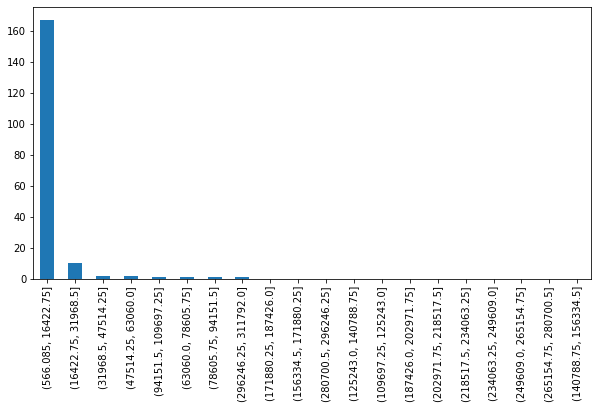

In [170]:
#Grafico dos intervalos iguais PC
counts = base['PC_inter'].value_counts()
counts.plot.bar(figsize=(10,5))

In [171]:
#Intervalos AM
base['AM_inter'] = pd.cut(base['AM'],20)
base['AM_inter'].value_counts()

(89.205, 12267.75]       166
(12267.75, 24207.5]       11
(24207.5, 36147.25]        2
(36147.25, 48087.0]        2
(48087.0, 60026.75]        2
(71966.5, 83906.25]        1
(227183.25, 239123.0]      1
(143605.0, 155544.75]      0
(131665.25, 143605.0]      0
(119725.5, 131665.25]      0
(215243.5, 227183.25]      0
(95846.0, 107785.75]       0
(83906.25, 95846.0]        0
(155544.75, 167484.5]      0
(60026.75, 71966.5]        0
(167484.5, 179424.25]      0
(179424.25, 191364.0]      0
(191364.0, 203303.75]      0
(203303.75, 215243.5]      0
(107785.75, 119725.5]      0
Name: AM_inter, dtype: int64

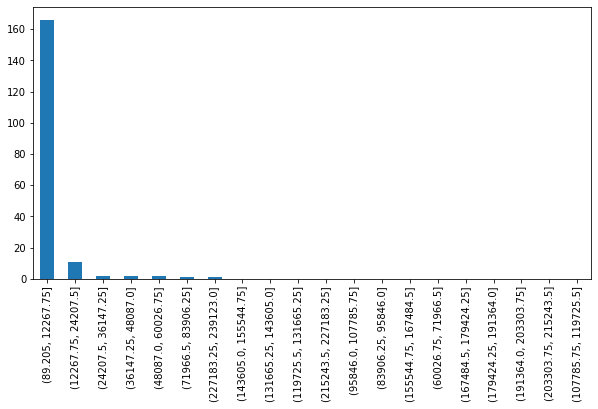

In [172]:
#Grafico dos intervalos iguais AM
counts = base['AM_inter'].value_counts()
counts.plot.bar(figsize=(10,5))

In [206]:
#Intervalos VOTOS
base['VOTOS_inter'] = pd.cut(base['VOTOS'],20)
base['VOTOS_inter'].value_counts()

(733.205, 37289.75]      171
(37289.75, 73129.5]        7
(108969.25, 144809.0]      3
(216488.5, 252328.25]      1
(73129.5, 108969.25]       1
(144809.0, 180648.75]      1
(682405.25, 718245.0]      1
(431527.0, 467366.75]      0
(395687.25, 431527.0]      0
(359847.5, 395687.25]      0
(646565.5, 682405.25]      0
(288168.0, 324007.75]      0
(252328.25, 288168.0]      0
(467366.75, 503206.5]      0
(180648.75, 216488.5]      0
(503206.5, 539046.25]      0
(539046.25, 574886.0]      0
(574886.0, 610725.75]      0
(610725.75, 646565.5]      0
(324007.75, 359847.5]      0
Name: VOTOS_inter, dtype: int64

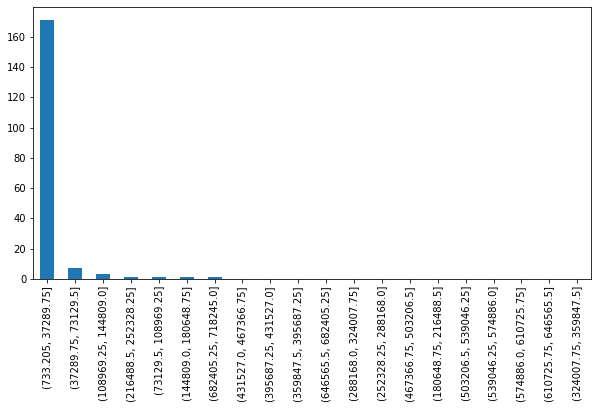

In [207]:
#Grafico dos intervalos iguais VOTOS
counts = base['VOTOS_inter'].value_counts()
counts.plot.bar(figsize=(10,5))

In [174]:
#descrevendo PC
base['PC'].describe()

count       185.000000
mean      10368.751351
std       25527.057328
min         877.000000
25%        3587.000000
50%        5169.000000
75%        8584.000000
max      311792.000000
Name: PC, dtype: float64

In [177]:
#Discretizando PC
base['PC_inter_1'] = pd.qcut(base['PC'],8)
base['PC_inter_1'].value_counts()

(876.999, 2796.0]      24
(13816.0, 311792.0]    23
(8584.0, 13816.0]      23
(6592.0, 8584.0]       23
(5169.0, 6592.0]       23
(4347.0, 5169.0]       23
(3587.0, 4347.0]       23
(2796.0, 3587.0]       23
Name: PC_inter_1, dtype: int64

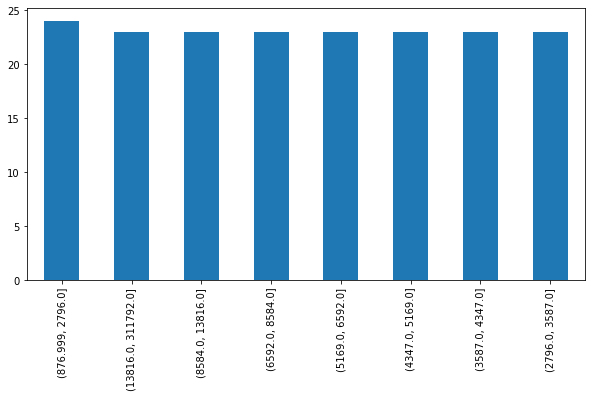

In [178]:
#Grafico de PC discretizado
counts = base['PC_inter_1'].value_counts()
counts.plot.bar(figsize=(10,5))

In [179]:
#descrevendo AM
base['AM'].describe()

count       185.000000
mean       7359.935135
std       19667.949410
min         328.000000
25%        2070.000000
50%        3314.000000
75%        5959.000000
max      239123.000000
Name: AM, dtype: float64

In [180]:
#Discretizando AM
base['AM_inter_1'] = pd.qcut(base['AM'],8)
base['AM_inter_1'].value_counts()

(327.999, 1362.0]     24
(9858.0, 239123.0]    23
(5959.0, 9858.0]      23
(4324.0, 5959.0]      23
(3314.0, 4324.0]      23
(2593.0, 3314.0]      23
(2070.0, 2593.0]      23
(1362.0, 2070.0]      23
Name: AM_inter_1, dtype: int64

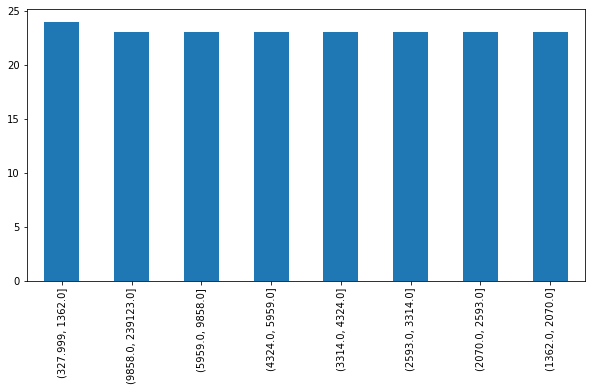

In [181]:
#Grafico de AM discretizado
counts = base['AM_inter_1'].value_counts()
counts.plot.bar(figsize=(10,5))

In [208]:
#descrevendo VOTOS
base['VOTOS'].describe()

count       185.000000
mean      20449.540541
std       58071.512019
min        1450.000000
25%        6261.000000
50%        9251.000000
75%       15176.000000
max      718245.000000
Name: VOTOS, dtype: float64

In [209]:
#Discretizando VOTOS
base['VOTOS_inter_1'] = pd.qcut(base['VOTOS'],8)
base['VOTOS_inter_1'].value_counts()

(1449.999, 4845.0]     24
(26424.0, 718245.0]    23
(15176.0, 26424.0]     23
(11307.0, 15176.0]     23
(9251.0, 11307.0]      23
(7607.0, 9251.0]       23
(6261.0, 7607.0]       23
(4845.0, 6261.0]       23
Name: VOTOS_inter_1, dtype: int64

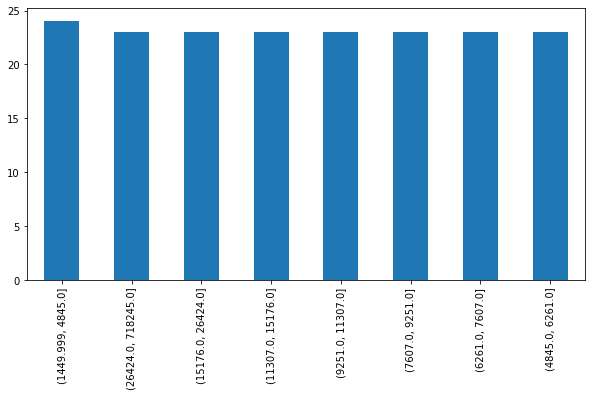

In [210]:
#Grafico de VOTOS discretizado
counts = base['VOTOS_inter_1'].value_counts()
counts.plot.bar(figsize=(10,5))

Removendo outliers utilizando z-score robusto (univariado)


In [212]:
base['PC'].describe()



count       185.000000
mean      10368.751351
std       25527.057328
min         877.000000
25%        3587.000000
50%        5169.000000
75%        8584.000000
max      311792.000000
Name: PC, dtype: float64

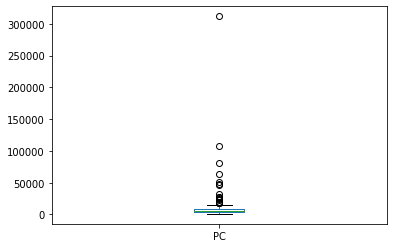

In [213]:
base['PC'].plot.box()


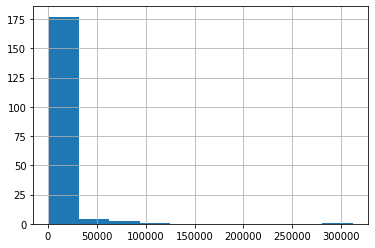

In [214]:
base['PC'].hist()


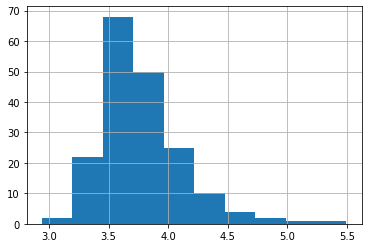

In [215]:
from numpy import log10
base['PC_log'] = log10(base['PC'])
base['PC_log'].hist()

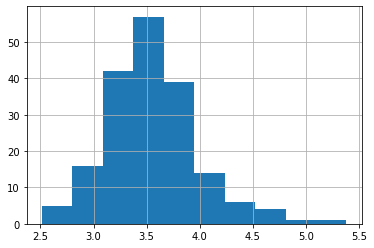

In [221]:
from numpy import log10
base['AM_log'] = log10(base['AM'])
base['AM_log'].hist()

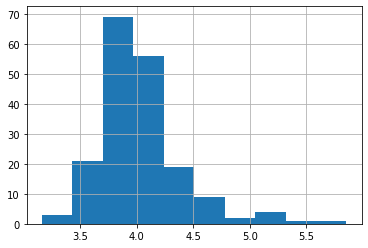

In [222]:
from numpy import log10
base['VOTOS_log'] = log10(base['VOTOS'])
base['VOTOS_log'].hist()

In [216]:
from numpy import abs
mad = abs(base['PC_log'] - base['PC_log'].median()).median()*(1/0.6745)
print(mad)

0.27312165918865916


In [217]:
base['PC_log'].mad()


0.26303926972560454

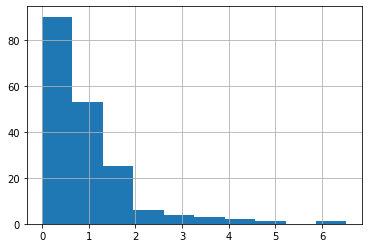

In [219]:
(abs(base['PC_log']-base['PC_log'].median())/mad).hist()


In [223]:
base[abs(base['PC_log']-base['PC_log'].median())/mad > 3.5]


,RD,MUNICIPIO,ELEITORES,VOTOS,PC,AM,PC_1,VOTOS_1,VOTOS_inter,VOTOS_inter_1,PC_log,AM_log,VOTOS_log
0,METROPOLITANA,RECIFE,1155816,718245,311792,239123,1.000000,1.000000,"(682405.25, 718245.0]","(26424.0, 718245.0]",5.493865,5.378621,5.856273
1,METROPOLITANA,JABOATÌO DOS GUARARAPES,452277,231682,107669,82928,0.343477,0.321196,"(216488.5, 252328.25]","(26424.0, 718245.0]",5.032091,4.918701,5.364892
2,METROPOLITANA,OLINDA,276081,169700,81276,50904,0.258588,0.234725,"(144809.0, 180648.75]","(26424.0, 718245.0]",4.909962,4.706752,5.229682
3,METROPOLITANA,PAULISTA,208363,129039,63229,40762,0.200544,0.177999,"(108969.25, 144809.0]","(26424.0, 718245.0]",4.800916,4.610255,5.110721
4,AGRESTE CENTRAL,CARUARU,216900,123843,50996,57523,0.161198,0.170750,"(108969.25, 144809.0]","(26424.0, 718245.0]",4.707536,4.759842,5.092871
5,SERTÌO DO SÌO FRANCISCO,PETROLINA,198599,117693,48707,38403,0.153836,0.162170,"(108969.25, 144809.0]","(26424.0, 718245.0]",4.687591,4.584365,5.070751


#Estatíticas Descritivas

In [233]:
#Maior Votação de Paulo Câmara
print('Maior votação de PC: ')
print('RD: ',base[base['PC'] ==  base['PC'].max()]['RD'].iloc[0])
print('Município: ',base[base['PC'] ==  base['PC'].max()]['MUNICIPIO'].iloc[0])
print('Votação: ',base[base['PC'] ==  base['PC'].max()]['PC'].iloc[0])


Maior votação de PC: 
RD:  METROPOLITANA
Município:  RECIFE
Votação:  311792


In [234]:
#Maior Votação de Armando Monteiro
print('Maior votação de AM: ')
print('RD: ',base[base['AM'] ==  base['AM'].max()]['RD'].iloc[0])
print('Município: ',base[base['AM'] ==  base['AM'].max()]['MUNICIPIO'].iloc[0])
print('Votação: ',base[base['AM'] ==  base['AM'].max()]['AM'].iloc[0])

Maior votação de AM: 
RD:  METROPOLITANA
Município:  RECIFE
Votação:  239123


In [235]:
# Soma dos votos de PC
base.PC.sum()

1918219

In [236]:
# Soma dos votos de AM
base.AM.sum()

1361588

In [237]:
# Soma dos Votos de PC por RD
base.groupby('RD')['PC'].sum()

RD
AGRESTE CENTRAL            197408
AGRESTE MERIDIONAL         131827
AGRESTE SETENTRIONAL       113198
MATA NORTE                 136725
MATA SUL                   174681
METROPOLITANA              803111
SERTÌO CENTRAL              47759
SERTÌO DE ITAPARICA         42269
SERTÌO DO ARARIPE           70288
SERTÌO DO MOXOTî            51481
SERTÌO DO PAJEò             69010
SERTÌO DO SÌO FRANCISCO     80462
Name: PC, dtype: int64

In [240]:
#Soma dos Votos de AM por RD
base.groupby('RD')['AM'].sum()

RD
AGRESTE CENTRAL            185063
AGRESTE MERIDIONAL         121637
AGRESTE SETENTRIONAL        99888
MATA NORTE                  70846
MATA SUL                    82087
METROPOLITANA              545884
SERTÌO CENTRAL              27046
SERTÌO DE ITAPARICA         16200
SERTÌO DO ARARIPE           52030
SERTÌO DO MOXOTî            32967
SERTÌO DO PAJEò             65137
SERTÌO DO SÌO FRANCISCO     62803
Name: AM, dtype: int64

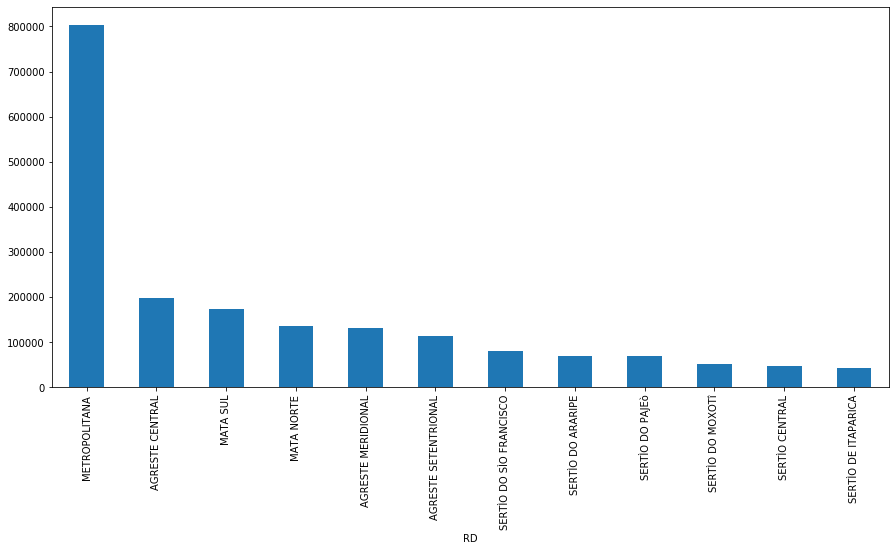

In [267]:
#Votação de PC por RD
base.groupby('RD')['PC'].sum().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))

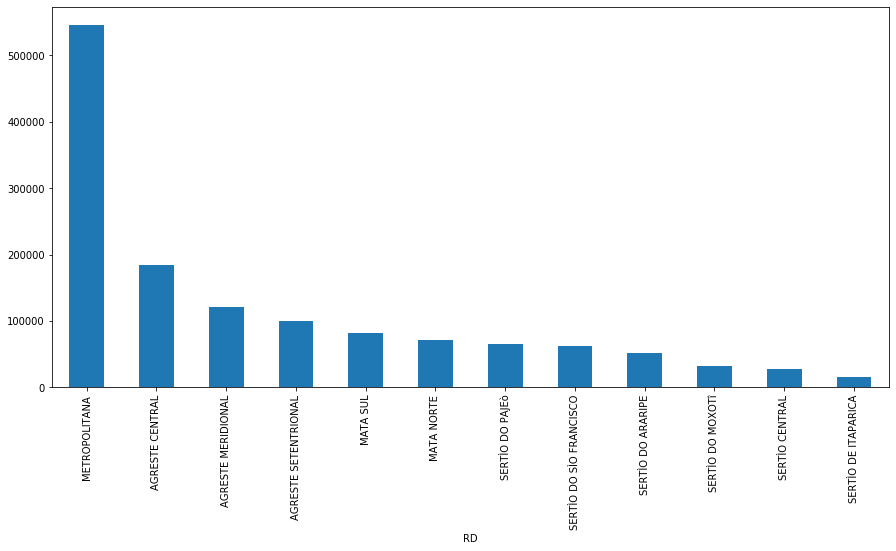

In [266]:
#Votação AM por RD
base.groupby('RD')['AM'].sum().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))

In [244]:
#Média de Votação PC por RD
base.groupby('RD')['PC'].mean()


RD
AGRESTE CENTRAL             7592.615385
AGRESTE MERIDIONAL          5070.269231
AGRESTE SETENTRIONAL        5957.789474
MATA NORTE                  7595.833333
MATA SUL                    7278.375000
METROPOLITANA              50194.437500
SERTÌO CENTRAL              5969.875000
SERTÌO DE ITAPARICA         6038.428571
SERTÌO DO ARARIPE           7028.800000
SERTÌO DO MOXOTî            7354.428571
SERTÌO DO PAJEò             4059.411765
SERTÌO DO SÌO FRANCISCO    11494.571429
Name: PC, dtype: float64

In [248]:
#Mediana de Votação PC por RD
base.groupby('RD')['PC'].median()

RD
AGRESTE CENTRAL             4515.5
AGRESTE MERIDIONAL          3778.5
AGRESTE SETENTRIONAL        5055.0
MATA NORTE                  6449.5
MATA SUL                    5579.0
METROPOLITANA              25133.5
SERTÌO CENTRAL              4542.5
SERTÌO DE ITAPARICA         4577.0
SERTÌO DO ARARIPE           5559.0
SERTÌO DO MOXOTî            7026.0
SERTÌO DO PAJEò             2972.0
SERTÌO DO SÌO FRANCISCO     6592.0
Name: PC, dtype: float64

In [245]:
#Média de Votação AM por RD
base.groupby('RD')['AM'].mean()

RD
AGRESTE CENTRAL             7117.807692
AGRESTE MERIDIONAL          4678.346154
AGRESTE SETENTRIONAL        5257.263158
MATA NORTE                  3935.888889
MATA SUL                    3420.291667
METROPOLITANA              34117.750000
SERTÌO CENTRAL              3380.750000
SERTÌO DE ITAPARICA         2314.285714
SERTÌO DO ARARIPE           5203.000000
SERTÌO DO MOXOTî            4709.571429
SERTÌO DO PAJEò             3831.588235
SERTÌO DO SÌO FRANCISCO     8971.857143
Name: AM, dtype: float64

In [249]:
#Mediana de Votação AM por RD
base.groupby('RD')['AM'].median()

RD
AGRESTE CENTRAL             4481.0
AGRESTE MERIDIONAL          3172.5
AGRESTE SETENTRIONAL        3595.0
MATA NORTE                  3047.5
MATA SUL                    2658.0
METROPOLITANA              14505.5
SERTÌO CENTRAL              2375.5
SERTÌO DE ITAPARICA         2084.0
SERTÌO DO ARARIPE           4932.0
SERTÌO DO MOXOTî            3864.0
SERTÌO DO PAJEò             2226.0
SERTÌO DO SÌO FRANCISCO     3751.0
Name: AM, dtype: float64

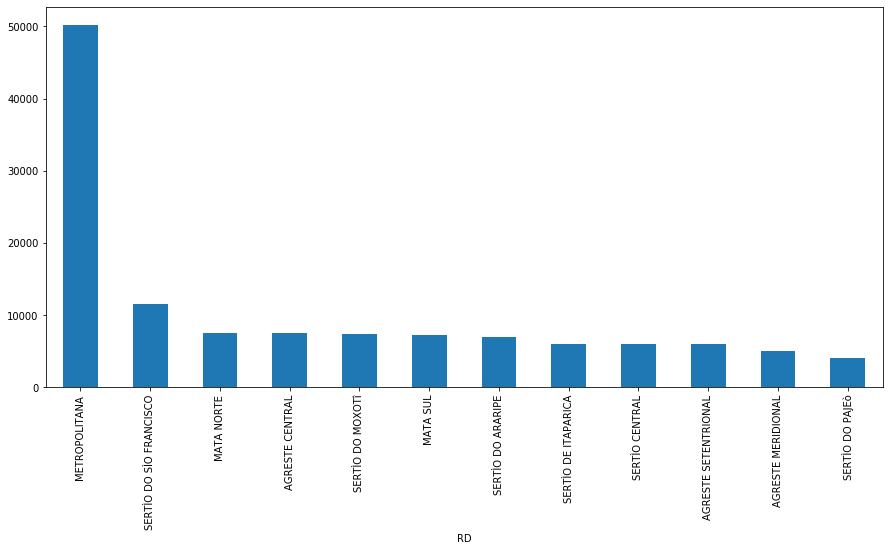

In [265]:
#Média de Votação de PC por RD
base.groupby('RD')['PC'].mean().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))


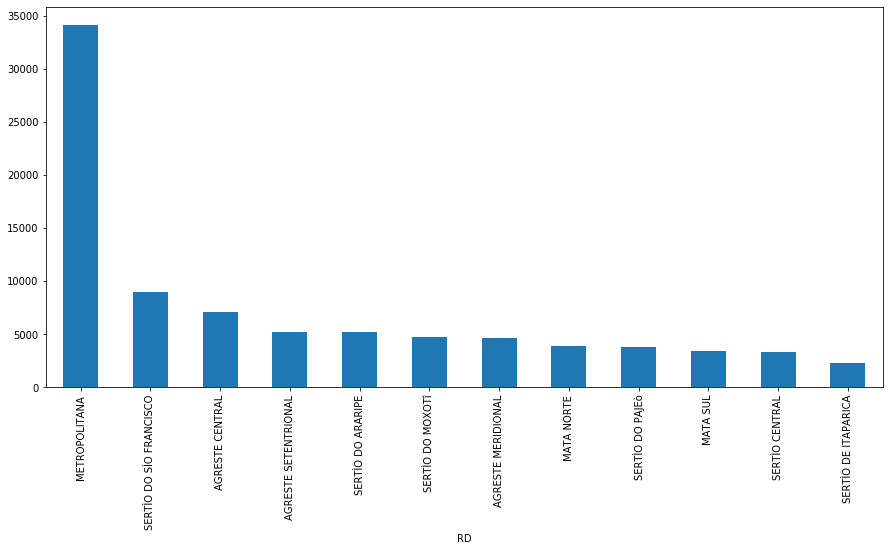

In [264]:
#Média de Votação de AM por RD
base.groupby('RD')['AM'].mean().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


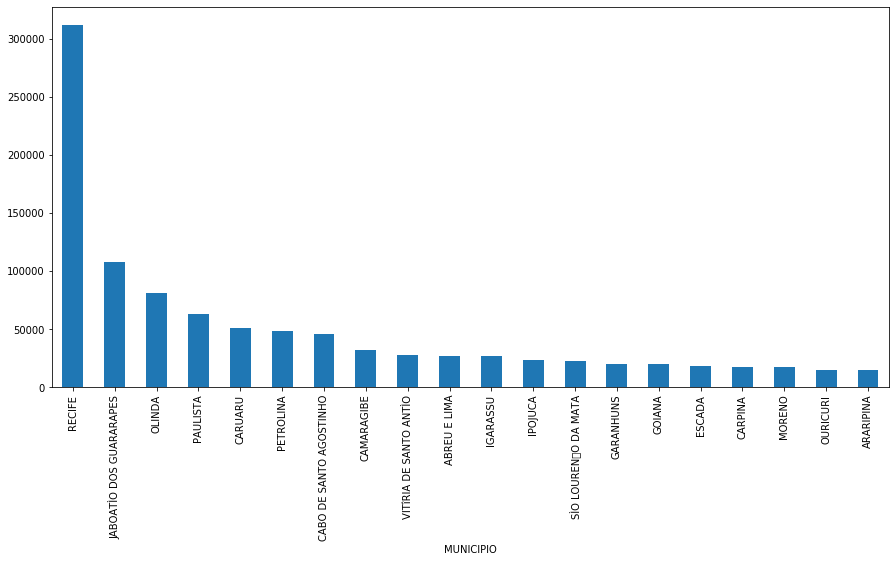

In [263]:
#10 MAIORES VOTAÇÕES DE PC
base.groupby('MUNICIPIO')['PC'].mean().nlargest(20).sort_values(ascending=False).plot.bar(figsize=(15,7))


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


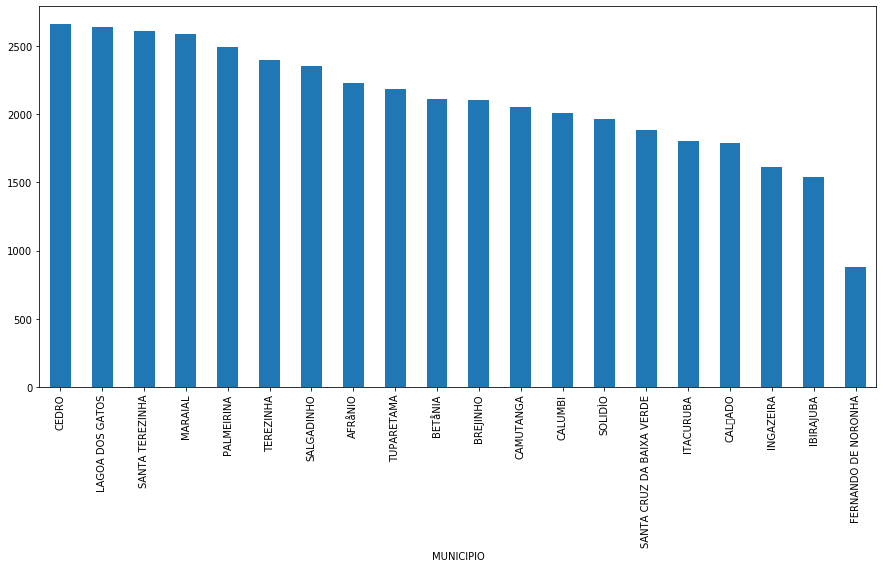

In [275]:
#10 MENORES VOTAÇÕES DE PC
base.groupby('MUNICIPIO')['PC'].mean().nsmallest(20).sort_values(ascending=False).plot.bar(figsize=(15,7))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)


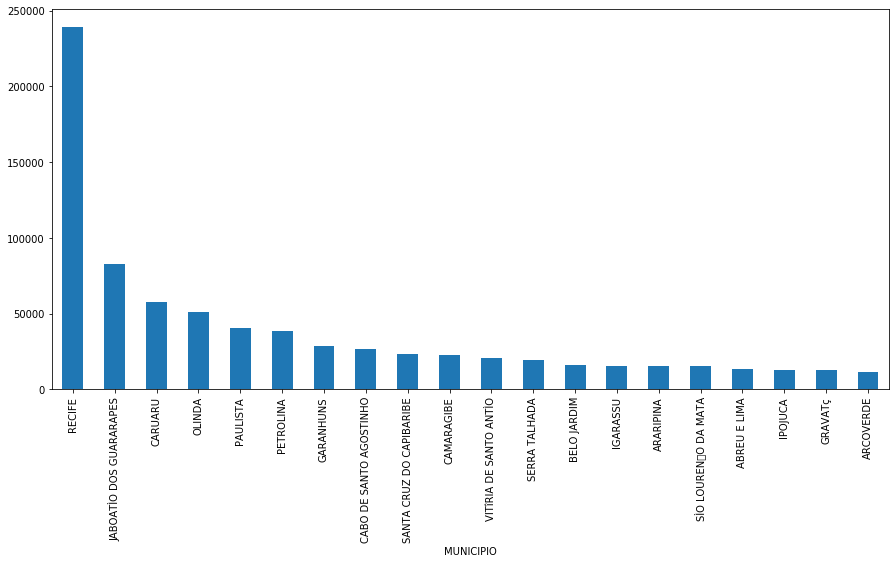

In [262]:
#10 MAIORES VOTAÇÕES DE AM
base.groupby('MUNICIPIO')['AM'].mean().nlargest(20).sort_values(ascending=False).plot.bar(figsize=(15,7))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


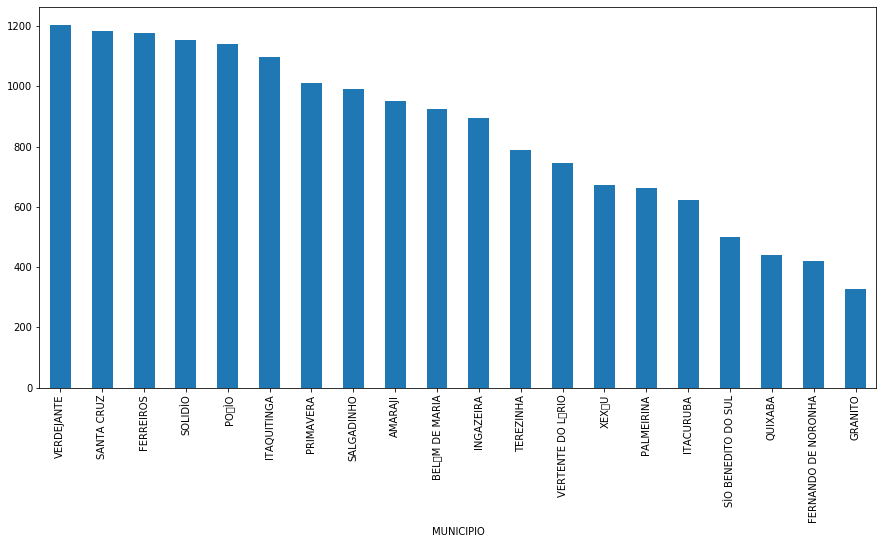

In [276]:
#10 MENORES VOTAÇÕES DE AM
base.groupby('MUNICIPIO')['AM'].mean().nsmallest(20).sort_values(ascending=False).plot.bar(figsize=(15,7))

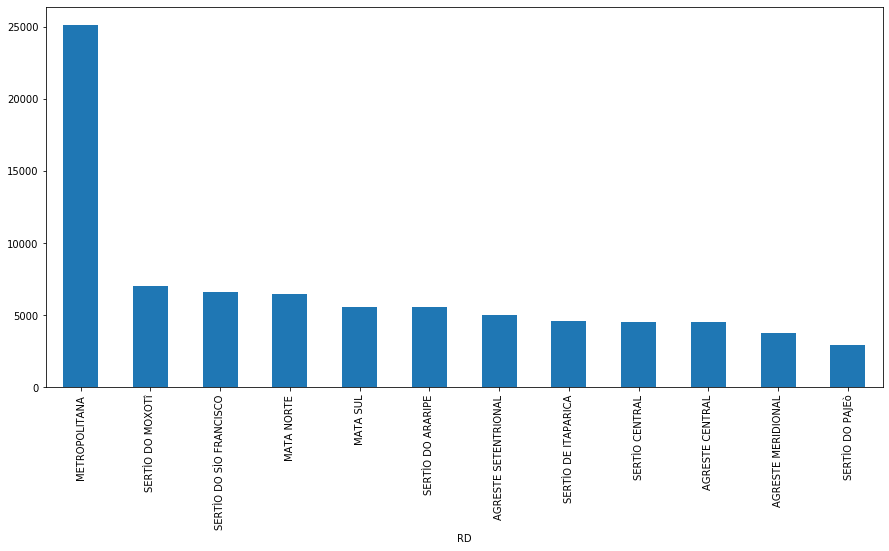

In [261]:
# Gráfico da mediana PC por RD
base.groupby('RD')['PC'].median().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))

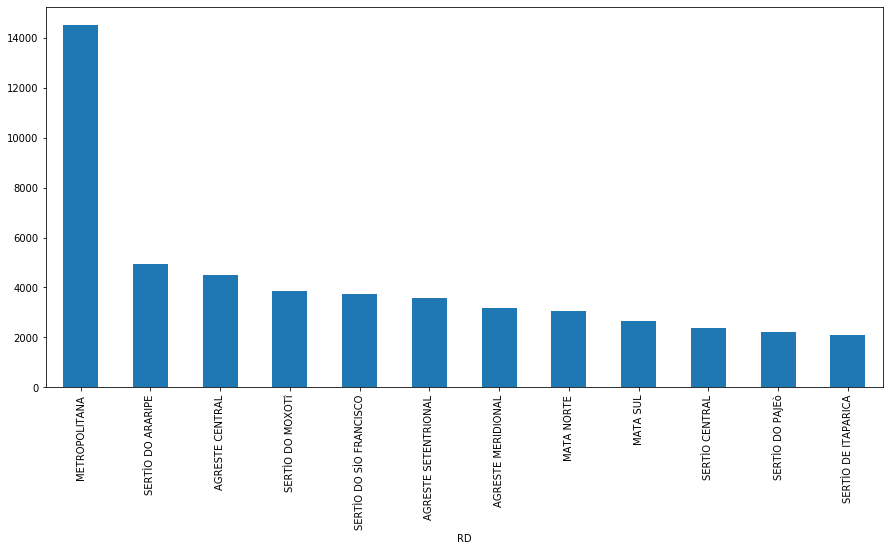

In [260]:
# Gráfico da mediana AM por RD
base.groupby('RD')['AM'].median().nlargest(12).sort_values(ascending=False).plot.bar(figsize=(15,7))

In [256]:
# Desvio Padrão PC por RD
base.groupby('RD')['PC'].std()

RD
AGRESTE CENTRAL             9424.459094
AGRESTE MERIDIONAL          3951.472865
AGRESTE SETENTRIONAL        3461.228725
MATA NORTE                  3915.848150
MATA SUL                    5697.311828
METROPOLITANA              75565.287341
SERTÌO CENTRAL              4127.657981
SERTÌO DE ITAPARICA         3305.708238
SERTÌO DO ARARIPE           4495.520828
SERTÌO DO MOXOTî            3933.453989
SERTÌO DO PAJEò             2766.589350
SERTÌO DO SÌO FRANCISCO    16536.891857
Name: PC, dtype: float64

In [257]:
# Desvio Padrão AM por RD
base.groupby('RD')['AM'].std()

RD
AGRESTE CENTRAL            10868.928727
AGRESTE MERIDIONAL          5427.935106
AGRESTE SETENTRIONAL        5165.616203
MATA NORTE                  2910.615740
MATA SUL                    3956.510941
METROPOLITANA              58839.083109
SERTÌO CENTRAL              2343.253340
SERTÌO DE ITAPARICA         1436.906250
SERTÌO DO ARARIPE           4398.683793
SERTÌO DO MOXOTî            3206.487739
SERTÌO DO PAJEò             4371.464258
SERTÌO DO SÌO FRANCISCO    13146.877759
Name: AM, dtype: float64